# Support Vector Machines 



## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


Unique variables in the target column we are trying to predict (quality)

In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

array(['Legit', 'Fraud'], dtype=object)

Countplot that displays the count per category of Legit vs Fraud.

<AxesSubplot:xlabel='quality', ylabel='count'>

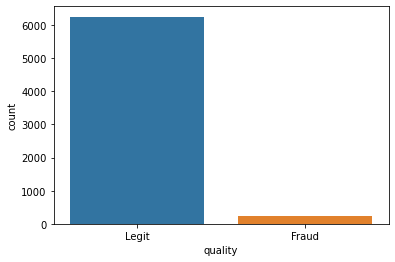

In [6]:
sns.countplot(data = df, x = 'quality')

<AxesSubplot:xlabel='type', ylabel='count'>

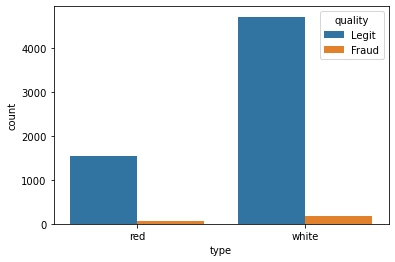

In [7]:
sns.countplot(data = df, x = 'type', hue = 'quality')

Percentage of red wines and white wines are fraud

In [8]:
print('Percentage of fraud in Red Wines:',len(df[(df['type']=='red') & (df['quality'] == 'Fraud')])/len(df[df['type']=='red']) *100)

Percentage of fraud in Red Wines: 3.9399624765478425


In [9]:
print('Percentage of fraud in White Wines:',len(df[(df['type']=='white') & (df['quality'] == 'Fraud')])/len(df[df['type']=='white']) *100)

Percentage of fraud in White Wines: 3.7362188648427925


**Correlation between the various features and the "quality" column. To do this we need to map the column to 0 and 1 instead of a string.**

In [10]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud':1})

In [11]:
corr_d = pd.Series(data = df.corr()['Fraud'])
corr_d.sort_values(inplace = True)

**Bar plot of the correlation values to Fraudlent wine.**

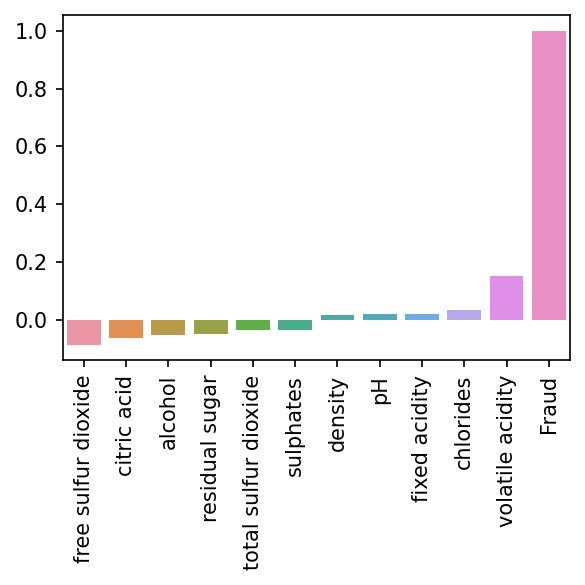

In [12]:
plt.figure(figsize = (4,4), dpi = 150)
sns.barplot(x = corr_d.index, y = corr_d.values)
plt.xticks(rotation=90)
plt.tight_layout()

**Clustermap with seaborn to explore the relationships between variables.**

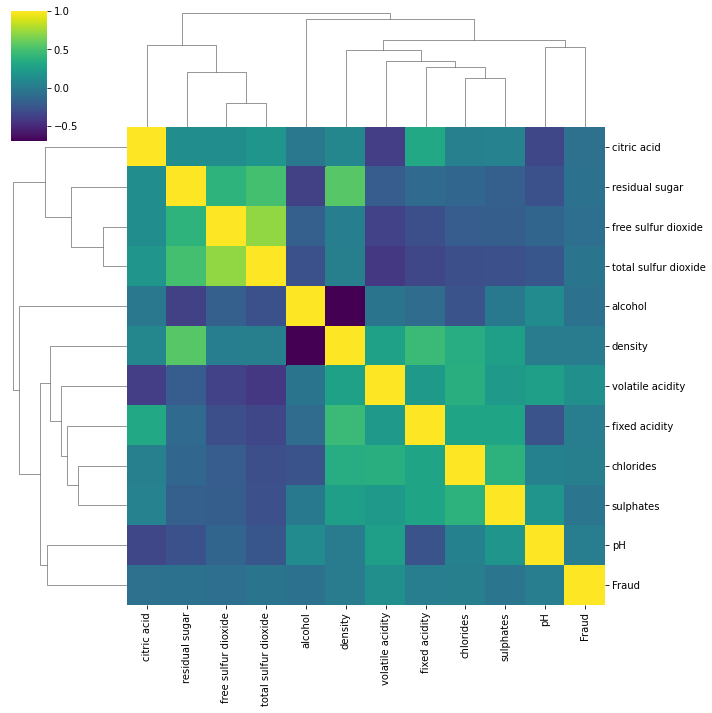

In [46]:
sns.clustermap(df.corr(), cmap = 'viridis')

----
## Machine Learning Model

**Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [13]:
df['red'] = df['type'].map({'red':1, 'white':0}) 

In [14]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud,red
612,7.5,0.64,0.00,2.4,0.077,18.0,29.0,0.99650,3.32,0.60,10.0,Legit,red,0,1
3732,8.3,0.24,0.27,2.1,0.030,22.0,162.0,0.99140,2.99,0.68,11.9,Legit,white,0,0
907,6.1,0.56,0.00,2.2,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,Legit,red,0,1
6213,7.1,0.33,0.18,6.3,0.094,27.0,166.0,0.99474,2.90,0.49,9.5,Legit,white,0,0
4046,6.5,0.27,0.26,8.2,0.042,21.0,133.0,0.99612,3.43,0.64,9.8,Legit,white,0,0


**Separate out the data into X features and y target label ("quality" column)**

In [15]:
X = df.drop(['quality', 'type', 'Fraud'], axis = 1)

In [16]:
y = df['quality']

**Perform a Train|Test split on the data, with a 10% test size**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Scale the X train and X test data.**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [22]:
scaled_X_test = scaler.transform(X_test)

**Create an instance of a Support Vector Machine classifier. However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online.**

In [23]:
from sklearn.svm import SVC

In [24]:
svc = SVC(class_weight = 'balanced')

**Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1], 
              'gamma':['scale', 'auto']}

In [27]:
grid = GridSearchCV(svc, param_grid = param_grid)

In [30]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [29]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

**Display the confusion matrix and classification report for your model.**

In [32]:
y_pred = grid.predict(scaled_X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test, y_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

